In [1]:
import sys, os
from pathlib import Path
sys.path.append(str(Path(os.path.dirname(os.path.abspath("__file__"))).parent))

In [2]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch

from model.loss import calc_class_balanced_weight

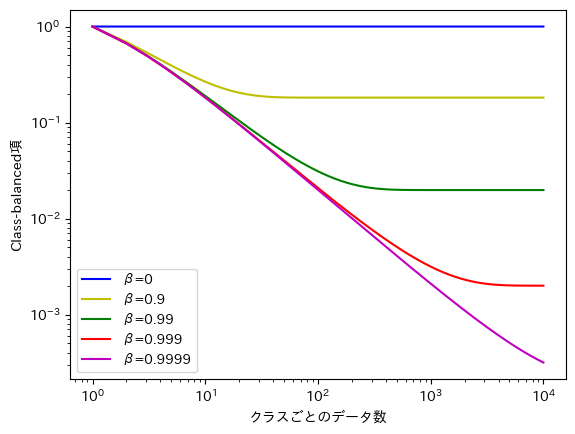

In [3]:
betas = (0, 0.9, 0.99, 0.999, 0.9999)
colors = ("b", "y", "g", "r", "m")

for beta, color in zip(betas, colors):
    x = range(1, 10000)
    y = []
    for num in x:
        weight = calc_class_balanced_weight(torch.tensor([num, 1]), beta=beta)
        y.append(weight[0])
    plt.plot(x, y, color=color, label=f"β={beta}")

plt.xlabel('クラスごとのデータ数')
plt.ylabel('Class-balanced項')
plt.xscale("log")
plt.yscale("log")
plt.legend()